<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

In [ ]:
set_seed(999, reproducible=True)

In [1]:
#|output: asis
#| echo: false
show_doc(DualGANLoss)

---

[source](https://github.com/tmabraham/UPIT/tree/master/blob/master/upit/train/dualgan.py#L18){target="_blank" style="float:right; font-size:smaller"}

### DualGANLoss

>      DualGANLoss (dualgan:torch.nn.modules.module.Module, l_adv:float=1.0,
>                   l_rec:float=1.0, l_idt:float=0.0)

DualGAN loss function. The individual loss terms are also atrributes of this class that are accessed by fastai for recording during training.

Attributes: 

`self.dualgan` (`nn.Module`): The DualGAN model. 

`self.l_A` (`float`): lambda_A, weight of domain A losses. 

`self.l_B` (`float`): lambda_B, weight of domain B losses. 

`self.crit` (`AdaptiveLoss`): The adversarial loss function (either a BCE or MSE loss depending on `lsgan` argument) 

`self.real_A` and `self.real_B` (`fastai.torch_core.TensorImage`): Real images from domain A and B. 

`self.gen_loss` (`torch.FloatTensor`): The generator loss calculated in the forward function 

`self.cyc_loss` (`torch.FloatTensor`): The cyclic loss calculated in the forward function

In [2]:
#|output: asis
#| echo: false
show_doc(compute_gradient_penalty)

---

[source](https://github.com/tmabraham/UPIT/tree/master/blob/master/upit/train/dualgan.py#L68){target="_blank" style="float:right; font-size:smaller"}

### compute_gradient_penalty

>      compute_gradient_penalty (D, real_samples, fake_samples)

Calculates the gradient penalty loss for WGAN GP

In [3]:
#|output: asis
#| echo: false
show_doc(DualGANTrainer)

---

[source](https://github.com/tmabraham/UPIT/tree/master/blob/master/upit/train/dualgan.py#L90){target="_blank" style="float:right; font-size:smaller"}

### DualGANTrainer

>      DualGANTrainer (n_crit=2, clip_value=0.1, l_gp=None)

`Learner` Callback for training a DualGAN model.

In [4]:
#|output: asis
#| echo: false
show_doc(dual_learner)

---

[source](https://github.com/tmabraham/UPIT/tree/master/blob/master/upit/train/dualgan.py#L176){target="_blank" style="float:right; font-size:smaller"}

### dual_learner

>      dual_learner (dls:fastai.data.load.DataLoader,
>                    m:upit.models.dualgan.DualGAN, opt_func=<function RMSProp>,
>                    loss_func=<class '__main__.DualGANLoss'>,
>                    show_imgs:bool=True, imgA:bool=True, imgB:bool=True,
>                    show_img_interval:bool=10, metrics:list=[], cbs:list=[],
>                    lr=0.001, splitter:<built-infunctioncallable>=<function
>                    trainable_params>, path=None, model_dir='models', wd=None,
>                    wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95),
>                    default_cbs:bool=True)

Initialize and return a `Learner` object with the data in `dls`, DualGAN model `m`, optimizer function `opt_func`, metrics `metrics`,
and callbacks `cbs`. Additionally, if `show_imgs` is True, it will show intermediate predictions during training. It will show domain 
B-to-A predictions if `imgA` is True and/or domain A-to-B predictions if `imgB` is True. Additionally, it will show images every 
`show_img_interval` epochs. ` Other `Learner` arguments can be passed as well.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| dls |  |  | `DataLoaders` containing data for each dataset needed for `model` |
| m | DualGAN |  |  |
| opt_func | function | Adam | Optimisation function for training |
| loss_func | callable \| None | None | Loss function for training |
| show_imgs | bool | True |  |
| imgA | bool | True |  |
| imgB | bool | True |  |
| show_img_interval | bool | 10 |  |
| metrics | NoneType | None | Printed after each epoch |
| cbs | NoneType | None | Callbacks |
| lr | float | 0.001 | Learning rate |
| splitter | callable | trainable_params | Used to split parameters into layer groups |
| path | NoneType | None | Parent directory to save, load, and export models |
| model_dir | str | models | Subdirectory to save and load models |
| wd | NoneType | None | Weight decay |
| wd_bn_bias | bool | False | Apply weight decay to batchnorm bias params? |
| train_bn | bool | True | Always train batchnorm layers? |
| moms | tuple | (0.95, 0.85, 0.95) | Momentum |
| default_cbs | bool | True | Include default callbacks? |

## Quick Test

In [ ]:
horse2zebra = untar_data('https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip')

In [ ]:
folders = horse2zebra.ls().sorted()

In [ ]:
trainA_path = folders[2]
trainB_path = folders[3]
testA_path = folders[0]
testB_path = folders[1]

In [ ]:
dls = get_dls(trainA_path, trainB_path,num_A=100)

In [ ]:
dual_gan = DualGAN()
learn = dual_learner(dls, dual_gan,show_img_interval=1)

In [ ]:
learn.show_training_loop()

Start Fit
   - before_fit     : [TrainEvalCallback, ShowImgsCallback, Recorder, ProgressCallback]
  Start Epoch Loop
     - before_epoch   : [Recorder, ProgressCallback]
    Start Train
       - before_train   : [TrainEvalCallback, DualGANTrainer, Recorder, ProgressCallback]
      Start Batch Loop
         - before_batch   : [DualGANTrainer]
         - after_pred     : [DualGANTrainer]
         - after_loss     : []
         - before_backward: []
         - before_step    : []
         - after_step     : []
         - after_cancel_batch: []
         - after_batch    : [TrainEvalCallback, Recorder, ProgressCallback]
      End Batch Loop
    End Train
     - after_cancel_train: [Recorder]
     - after_train    : [Recorder, ProgressCallback]
    Start Valid
       - before_validate: [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - **CBs same as train batch**: []
      End Batch Loop
    End Valid
     - after_cancel_validate: [Recorder]
     - after_valida

In [ ]:
test_eq(type(learn),Learner)

/home/tmabraham/anaconda3/lib/python3.7/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


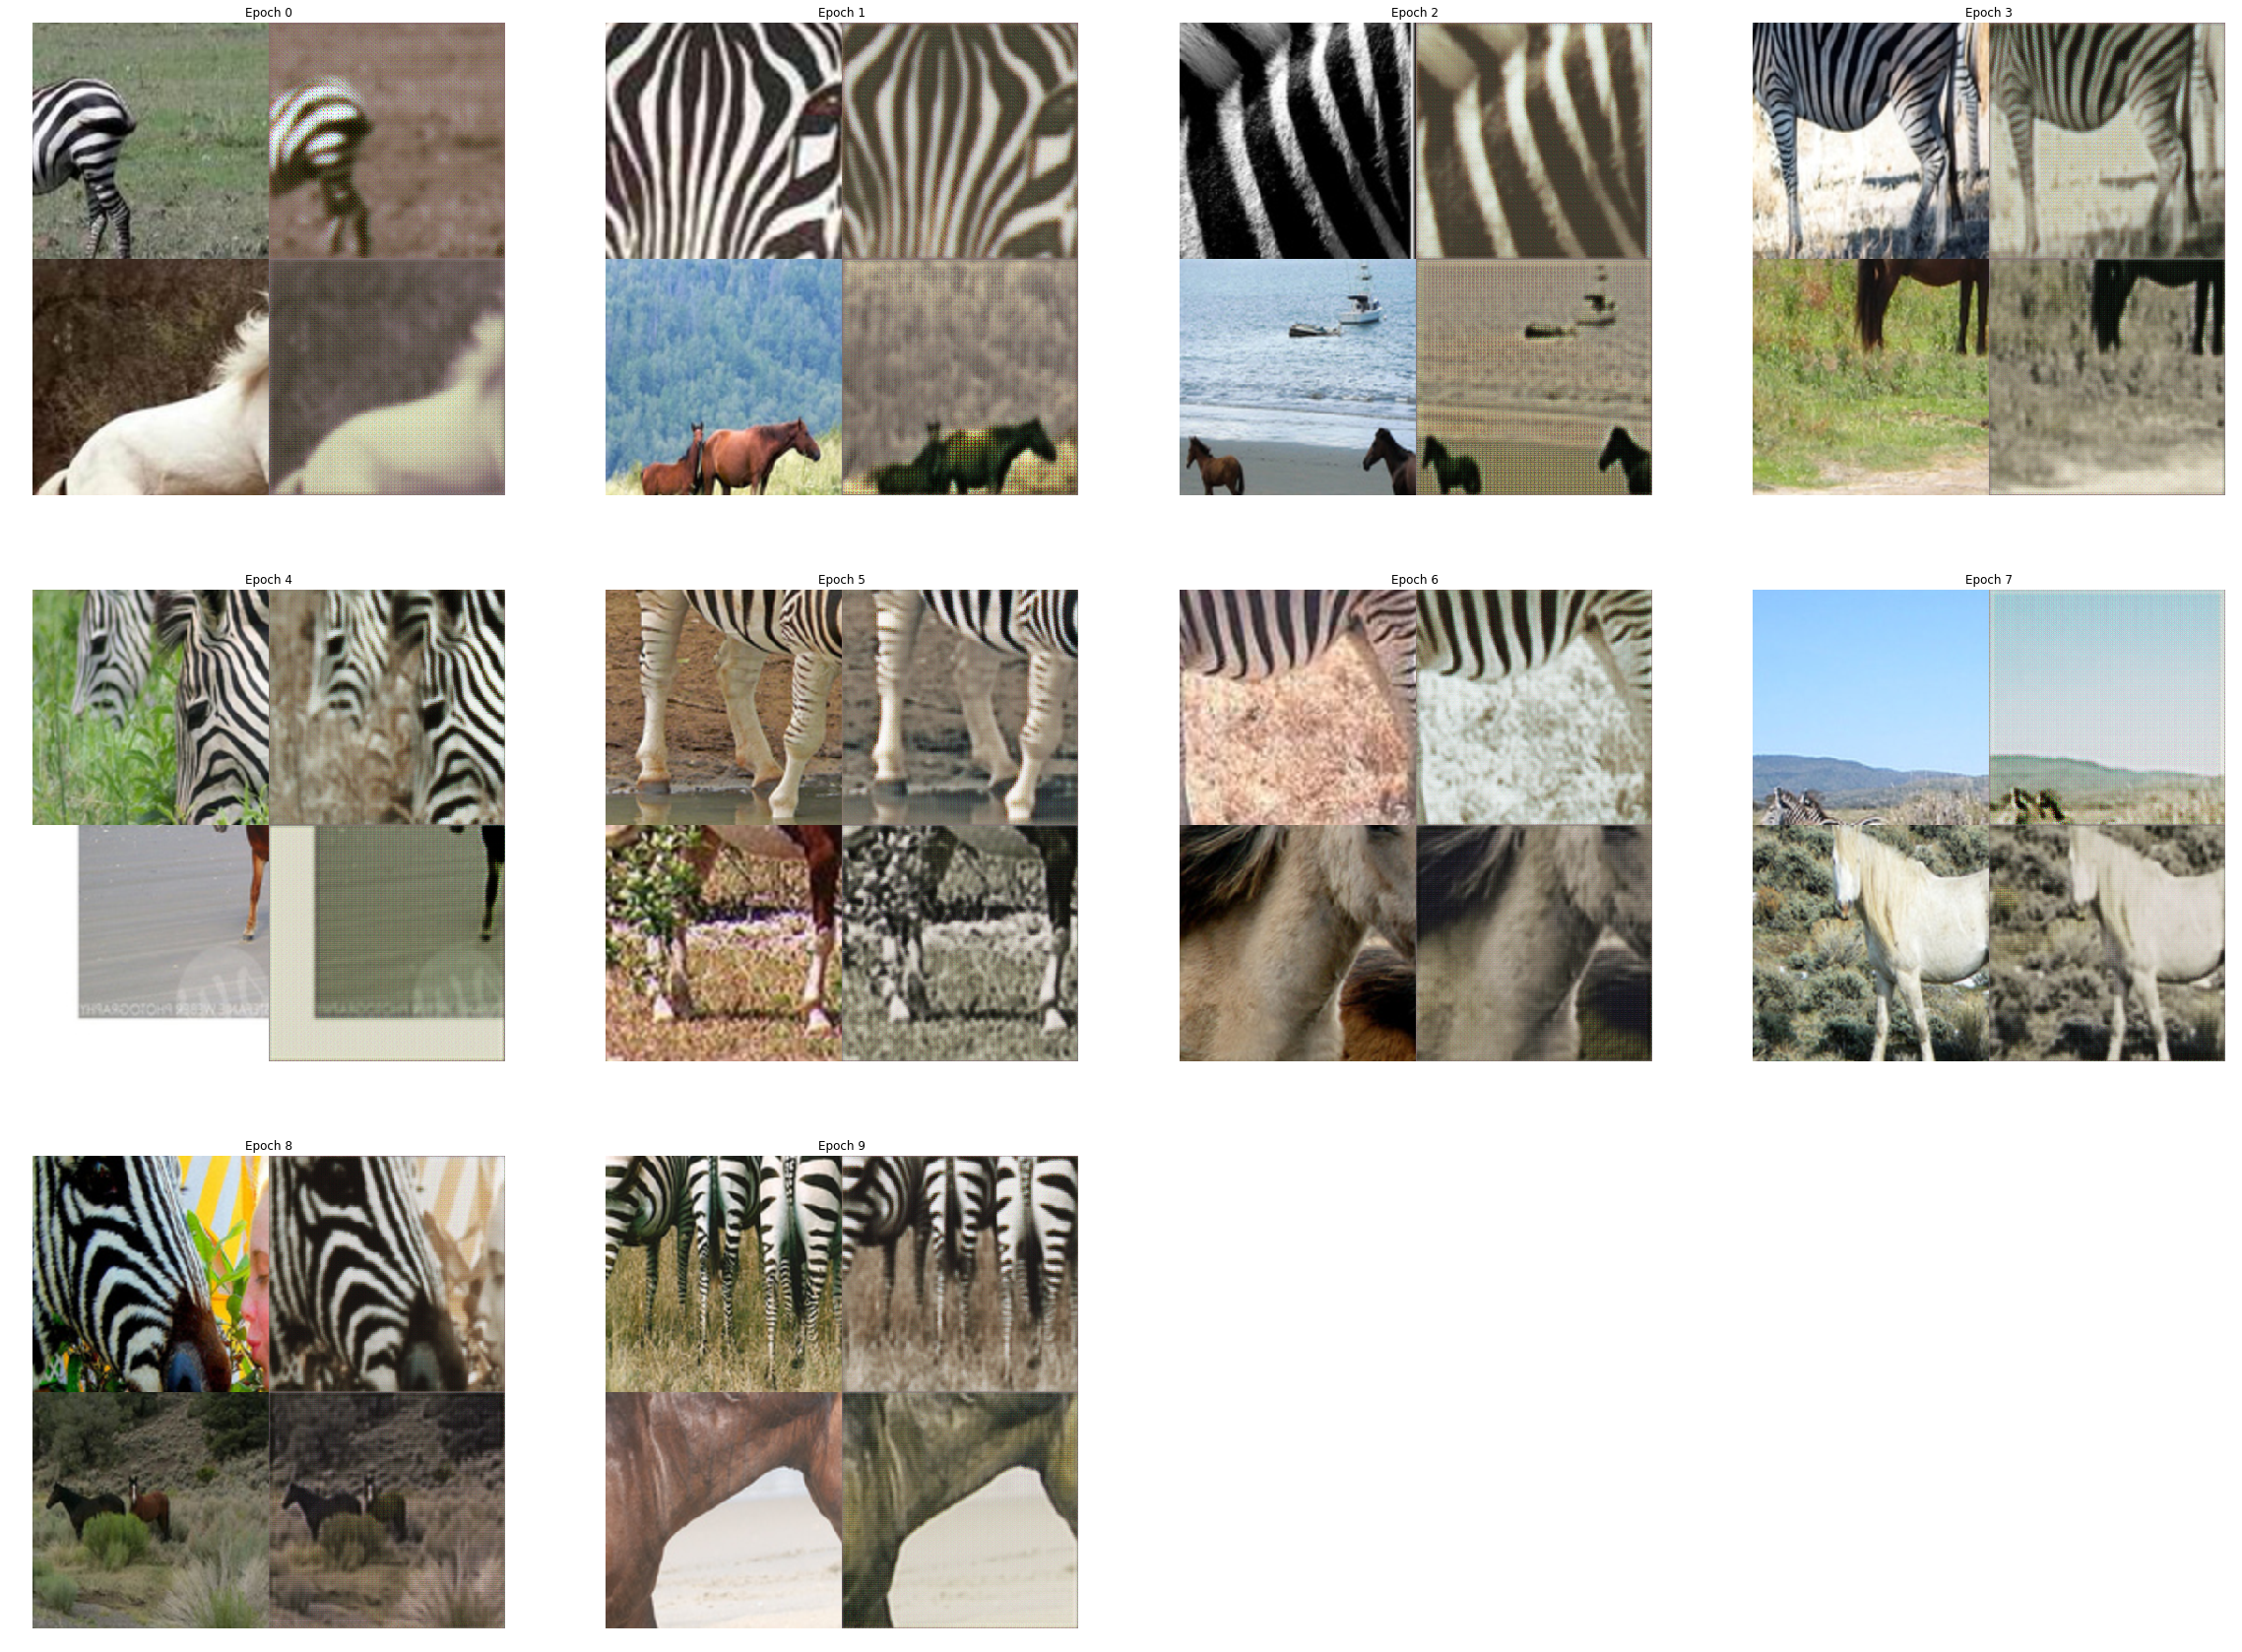

In [ ]:
learn.fit_flat_lin(5,5,2e-4)

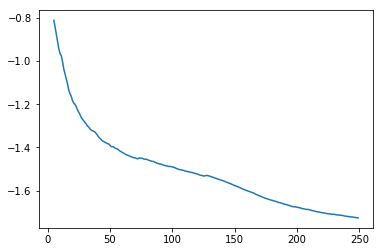

In [ ]:
learn.recorder.plot_loss(with_valid=False)